# Earnings Outcomes of U.S. Colleges: Linking State Wealth and Long-Term Graduate Earnings

### Hypothesis: Graduates from colleges located in wealthier states achieve higher post-graduate earnings than graduates from colleges in less wealthy states.

Independent variable: State wealth measured by average household income
Dependent variables: Earnings after 6 and 10 years




In [247]:
# install necessary packages
!pip install liac-arff
!pip install us


In [248]:
# import necessary libraries
import arff   # this is liac-arff, not scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load ARFF using liac-arff
with open('../project/dataset.arff', 'r') as f:
    arff_data = arff.load(f)

# Convert arff to DataFrame
collegedf = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])

# cleanup the DataFrame because some columns had symbols like "?" or "N/A" that need to be replaced with NaN
# This is useful for cleaning up any non-numeric entries in the earnings columns.   
collegedf = collegedf.replace('?', np.nan)
for col in collegedf.select_dtypes([object]).columns:
    collegedf[col] = collegedf[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

#show the first few rows of the DataFrame
collegedf


,UNITID,school_name,city,state,zip,school_webpage,latitude,longitude,admission_rate,sat_verbal_midrange,...,carnegie_undergraduate,carnegie_size,religious_affiliation,percent_female,agege24,faminc,mean_earnings_6_years,median_earnings_6_years,mean_earnings_10_years,median_earnings_10_years
0,100654,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,34.7834,-86.5685,0.8989,410.0,...,"Full-time four-year, inclusive","Medium 4-year, highly residential (3,000 to 9,...",None,0.52999997138977,0.07999999821186,40211.22,26100.0,22800.0,35300.0,31400.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,www.uab.edu,33.5022,-86.8092,0.8673,580.0,...,"Medium full-time four-year, selective, higher ...","Large 4-year, primarily nonresidential (over 9...",None,0.64999997615814,0.25999999046325,49894.65,37400.0,33200.0,46300.0,40300.0
2,100690,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,32.3626,-86.1740,NaN,NaN,...,"Medium full-time four-year, inclusivestudents ...","Very small 4-year, primarily nonresidential (l...",Churches of Christ,0.50999999046325,0.82999998331069,38712.18,38500.0,32800.0,42100.0,38100.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,34.7228,-86.6384,0.8062,575.0,...,"Medium full-time four-year, selective, higher ...","Medium 4-year, primarily nonresidential (3,000...",None,0.55000001192092,0.28999999165534,54155.4,39300.0,36700.0,52700.0,46600.0
4,100724,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu/email/index.aspx,32.3643,-86.2957,0.5125,430.0,...,"Full-time four-year, inclusive","Medium 4-year, primarily residential (3,000 to...",None,0.56999999284744,0.10999999940395,31846.99,21200.0,19300.0,30700.0,27800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,483045,Central Georgia Technical College,Warner Robins,GA,31088,www.centralgatech.edu,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
7059,483054,Barber School of Pittsburgh,Pittsburgh,PA,15220,barberschoolofpittsburgh.com,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
7060,483106,The Salon Professional Academy-South Plainfield,South Plainfield,NJ,7080,www.thesalonprofessionalacademynewjersey.com/,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
7061,483124,Arizona State University-Skysong,Scottsdale,AZ,85257,www.asu.edu/,NaN,NaN,0.6343,445.0,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN


In [ ]:
# creates a list of the four earnings-related columns we want to work with.

earn_cols = [
    "mean_earnings_6_years",
    "median_earnings_6_years",
    "mean_earnings_10_years",
    "median_earnings_10_years",
]
# For each column:If it exists in the dataframe, try to convert the values to numbers.
#If a value can’t be converted (e.g., "?" or "N/A"), replace it with NaN (missing value) instead of throwing an error.
# This ensures the columns are clean numeric columns ready for calculations.
for c in earn_cols:
    if c in collegedf.columns:
        collegedf[c] = pd.to_numeric(collegedf[c], errors="coerce")

# Compute growth metrics (internal comparison)
# This gives you a relative growth measure:
#growth = 1.0 → no change
#growth > 1.0 → earnings increased
#growth < 1.0 → earnings decreased
if set(earn_cols).issubset(collegedf.columns):
    collegedf["growth_mean"] = collegedf["mean_earnings_10_years"] / collegedf["mean_earnings_6_years"]
    collegedf["growth_median"] = collegedf["median_earnings_10_years"] / collegedf["median_earnings_6_years"]

collegedf[["state","mean_earnings_6_years","mean_earnings_10_years","growth_mean","growth_median"]].head(10)


,state,mean_earnings_6_years,mean_earnings_10_years,growth_mean,growth_median
0,AL,26100.0,35300.0,1.352490,1.377193
1,AL,37400.0,46300.0,1.237968,1.213855
2,AL,38500.0,42100.0,1.093506,1.161585
3,AL,39300.0,52700.0,1.340967,1.269755
4,AL,21200.0,30700.0,1.448113,1.440415
5,AL,35700.0,49100.0,1.375350,1.288754
6,AL,25300.0,31400.0,1.241107,1.193833
7,AL,34600.0,41500.0,1.199422,1.192192
8,AL,30400.0,36700.0,1.207237,1.265455
9,AL,39300.0,52100.0,1.325700,1.264624


## Load Wikipedia Dataset, Normalising State codes and merging the Data together

In [250]:
# normalize state codes (already 2-letter abbreviations)
collegedf["state"] = collegedf["state"].astype(str).str.strip().str.upper()

# load state median income from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income"
state_income = pd.read_html(url, match="Median household income")[0]
state_income = state_income.rename(columns={state_income.columns[0]: "State"})
state_income["Median_Household_Income"] = (
    state_income[state_income.columns[1]].replace({r'[$,]': ''}, regex=True).astype(float)
)

# map full names -> 2-letter codes (50 states + DC)
state_to_abbr = {
    "Alabama":"AL","Alaska":"AK","Arizona":"AZ","Arkansas":"AR","California":"CA","Colorado":"CO",
    "Connecticut":"CT","Delaware":"DE","District of Columbia":"DC","Florida":"FL","Georgia":"GA",
    "Hawaii":"HI","Idaho":"ID","Illinois":"IL","Indiana":"IN","Iowa":"IA","Kansas":"KS",
    "Kentucky":"KY","Louisiana":"LA","Maine":"ME","Maryland":"MD","Massachusetts":"MA","Michigan":"MI",
    "Minnesota":"MN","Mississippi":"MS","Missouri":"MO","Montana":"MT","Nebraska":"NE","Nevada":"NV",
    "New Hampshire":"NH","New Jersey":"NJ","New Mexico":"NM","New York":"NY","North Carolina":"NC",
    "North Dakota":"ND","Ohio":"OH","Oklahoma":"OK","Oregon":"OR","Pennsylvania":"PA","Rhode Island":"RI",
    "South Carolina":"SC","South Dakota":"SD","Tennessee":"TN","Texas":"TX","Utah":"UT","Vermont":"VT",
    "Virginia":"VA","Washington":"WA","West Virginia":"WV","Wisconsin":"WI","Wyoming":"WY"
}
state_income["state"] = state_income["State"].map(state_to_abbr)

#  merge on "state"
merged = collegedf.merge(
    state_income[["state","State","Median_Household_Income"]],
    on="state", how="left"
)

# add names for territories not in wiki
territory_names = {
    "AS":"American Samoa","FM":"Federated States of Micronesia","GU":"Guam",
    "MH":"Marshall Islands","MP":"Northern Mariana Islands","PR":"Puerto Rico",
    "PW":"Palau","VI":"U.S. Virgin Islands"
}
merged["State"] = merged["State"].fillna(merged["state"].map(territory_names))

# coerce earnings + compute growth
earn_cols = ["mean_earnings_6_years","median_earnings_6_years",
             "mean_earnings_10_years","median_earnings_10_years"]
for c in earn_cols:
    if c in merged.columns:
        merged[c] = pd.to_numeric(merged[c], errors="coerce")

merged["growth_mean"] = merged["mean_earnings_10_years"] / merged["mean_earnings_6_years"]
merged["growth_median"] = merged["median_earnings_10_years"] / merged["median_earnings_6_years"]

#  summary table
summary_cols = ["state","State","Median_Household_Income"] + earn_cols + ["growth_mean","growth_median"]
summary_table = merged[summary_cols]

print("Rows:", len(merged))
print("Missing state income (territories):", merged["Median_Household_Income"].isna().sum())
summary_table.head(15)


Rows: 7063
Missing state income (territories): 174


,state,State,Median_Household_Income,mean_earnings_6_years,median_earnings_6_years,mean_earnings_10_years,median_earnings_10_years,growth_mean,growth_median
0,AL,Alabama,51734.0,26100.0,22800.0,35300.0,31400.0,1.352490,1.377193
1,AL,Alabama,51734.0,37400.0,33200.0,46300.0,40300.0,1.237968,1.213855
2,AL,Alabama,51734.0,38500.0,32800.0,42100.0,38100.0,1.093506,1.161585
3,AL,Alabama,51734.0,39300.0,36700.0,52700.0,46600.0,1.340967,1.269755
4,AL,Alabama,51734.0,21200.0,19300.0,30700.0,27800.0,1.448113,1.440415
5,AL,Alabama,51734.0,35700.0,32900.0,49100.0,42400.0,1.375350,1.288754
6,AL,Alabama,51734.0,25300.0,22700.0,31400.0,27100.0,1.241107,1.193833
7,AL,Alabama,51734.0,34600.0,33300.0,41500.0,39700.0,1.199422,1.192192
8,AL,Alabama,51734.0,30400.0,27500.0,36700.0,34800.0,1.207237,1.265455
9,AL,Alabama,51734.0,39300.0,35900.0,52100.0,45400.0,1.325700,1.264624


## ScatterPlot for Median Household Income Vs. Median earning after 6 years

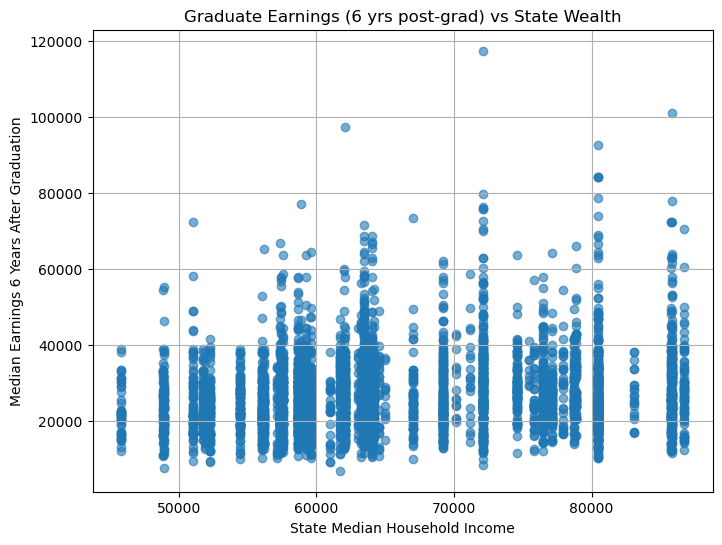

In [251]:
plot_df = summary_table.dropna(subset=["Median_Household_Income","median_earnings_6_years"])

plt.figure(figsize=(8,6))
plt.scatter(plot_df["Median_Household_Income"], plot_df["median_earnings_6_years"], alpha=0.6)
plt.xlabel("State Median Household Income")
plt.ylabel("Median Earnings 6 Years After Graduation")
plt.title("Graduate Earnings (6 yrs post-grad) vs State Wealth")
plt.grid(True)
plt.show()


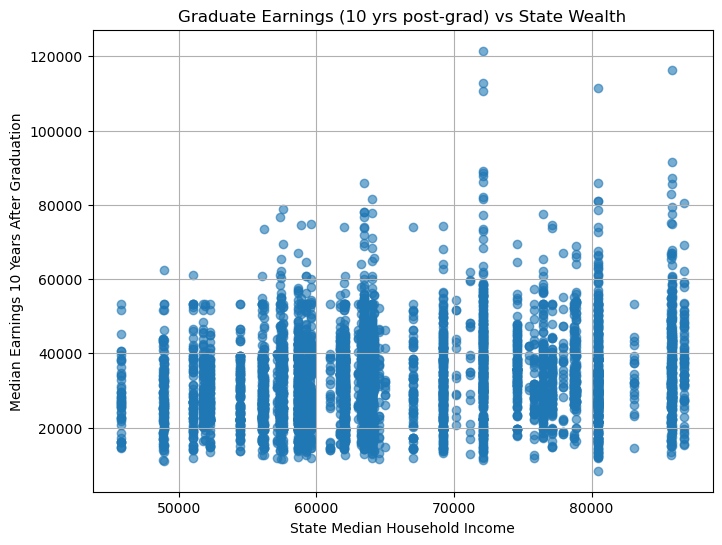

In [252]:
plot_df = summary_table.dropna(subset=["Median_Household_Income","median_earnings_10_years"])

plt.figure(figsize=(8,6))
plt.scatter(plot_df["Median_Household_Income"], plot_df["median_earnings_10_years"], alpha=0.6)
plt.xlabel("State Median Household Income")
plt.ylabel("Median Earnings 10 Years After Graduation")
plt.title("Graduate Earnings (10 yrs post-grad) vs State Wealth")
plt.grid(True)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_13008\2308831238.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 800x600 with 0 Axes>

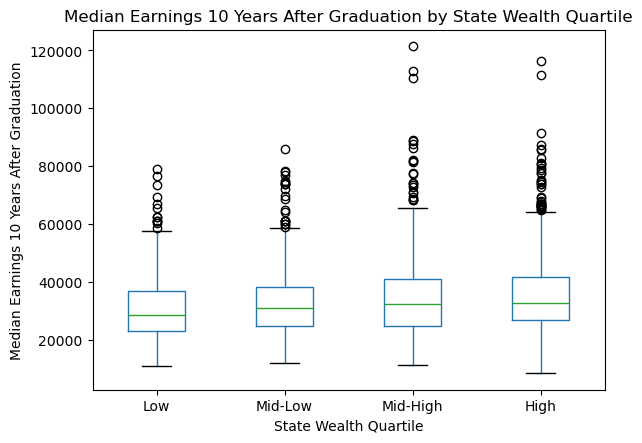

In [253]:
plot_df = summary_table.dropna(subset=["Median_Household_Income","median_earnings_10_years"])

plot_df["Wealth_Quartile"] = pd.qcut(plot_df["Median_Household_Income"], 4, labels=["Low","Mid-Low","Mid-High","High"])

plt.figure(figsize=(8,6))
plot_df.boxplot(column="median_earnings_10_years", by="Wealth_Quartile", grid=False)
plt.suptitle("")  
plt.title("Median Earnings 10 Years After Graduation by State Wealth Quartile")
plt.xlabel("State Wealth Quartile")
plt.ylabel("Median Earnings 10 Years After Graduation")
plt.show()


## Interactive Map Showing the Average Median earnings of graduates 6 years and 10 years after Graduation respectively

In [254]:
import plotly.express as px

# keep only rows with valid values
map_df = merged.dropna(subset=["median_earnings_6_years", "state"])

fig = px.choropleth(
    map_df,
    locations="state",                # <-- use your real column name
    locationmode="USA-states",
    color="median_earnings_6_years",  # what we color by
    hover_name="State",               # full name
    color_continuous_scale="Plasma",
    scope="usa",
    title="Median Earnings 6 Years After Graduation by State"
)

fig.show()


In [255]:
import plotly.express as px

# keep only rows with valid values
map_df = merged.dropna(subset=["median_earnings_6_years", "state"])

fig = px.choropleth(
    map_df,
    locations="state",                # <-- use your real column name
    locationmode="USA-states",
    color="median_earnings_10_years",  # what we color by
    hover_name="State",               # full name
    color_continuous_scale="Plasma",
    scope="usa",
    title="Median Earnings 10 Years After Graduation by State"
)

fig.show()


In [256]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Extract features and target, dropping missing values
reg_df = summary_table[["Median_Household_Income", "median_earnings_10_years"]].dropna()

# Define features (X) and target (y)
X = reg_df[["Median_Household_Income"]]
y = reg_df["median_earnings_10_years"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Print the intercept and evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print("Intercept:", lr.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Slope per $1000 increase i.e. For every $1000 increase, graduate earnings rise by:", lr.coef_[0] * 100)


#R2 shows that household income only explains 3% of variation in graduate earnings i.e. state wealth is a weak predictor by itself
#MSE high error therefore predictions deviate a lot from reality





Intercept: 18845.203198490395
R^2 Score: 0.032497165848123566
Mean Squared Error: 144007448.03804258
Slope per $1000 increase i.e. For every $1000 increase, graduate earnings rise by: 21.09896793615379


In [257]:
before_drop = summary_table.shape[0]
after_drop = reg_df.shape[0]
dropped = before_drop - after_drop
print(before_drop)
print(after_drop)
print (dropped)
print ((dropped / before_drop)*100)

7063
5196
1867
26.433526829958943


In [258]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Extract features and target, dropping missing values
reg_df = summary_table[["Median_Household_Income", "median_earnings_10_years"]].dropna()

# Define features (X) and target (y)
X = reg_df[["Median_Household_Income"]]
y = reg_df["median_earnings_10_years"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Print the intercept and evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print("Intercept:", lr.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Slope per $1000 increase i.e. For every $1000 increase, graduate earnings rise by:", lr.coef_[0] * 100)


Intercept: 18949.631434487084
R^2 Score: 0.03171020957290782
Mean Squared Error: 148574234.53599885
Slope per $1000 increase i.e. For every $1000 increase, graduate earnings rise by: 20.796416084584198


In [259]:
def count_states(collegedf, col="state"):
    states = set()
    for row in collegedf.itertuples(index=False):  # iterate rows
        state_value = getattr(row, "state", None)  # directly use state column
        if state_value and isinstance(state_value, str):
            states.add(state_value.strip())
    return len(states)

print("Number of states and territories:", count_states(collegedf))


Number of states and territories: 59


In [260]:
def count_universities(collegedf):
    universities = set()
    for row in collegedf.itertuples(index=False):
        uni_value = getattr(row, "school_name", None)  # use your actual column name
        if uni_value and isinstance(uni_value, str) and uni_value.strip():
            universities.add(uni_value.strip())
    return len(universities)

print("Number of universities:", count_universities(collegedf))

Number of universities: 6961


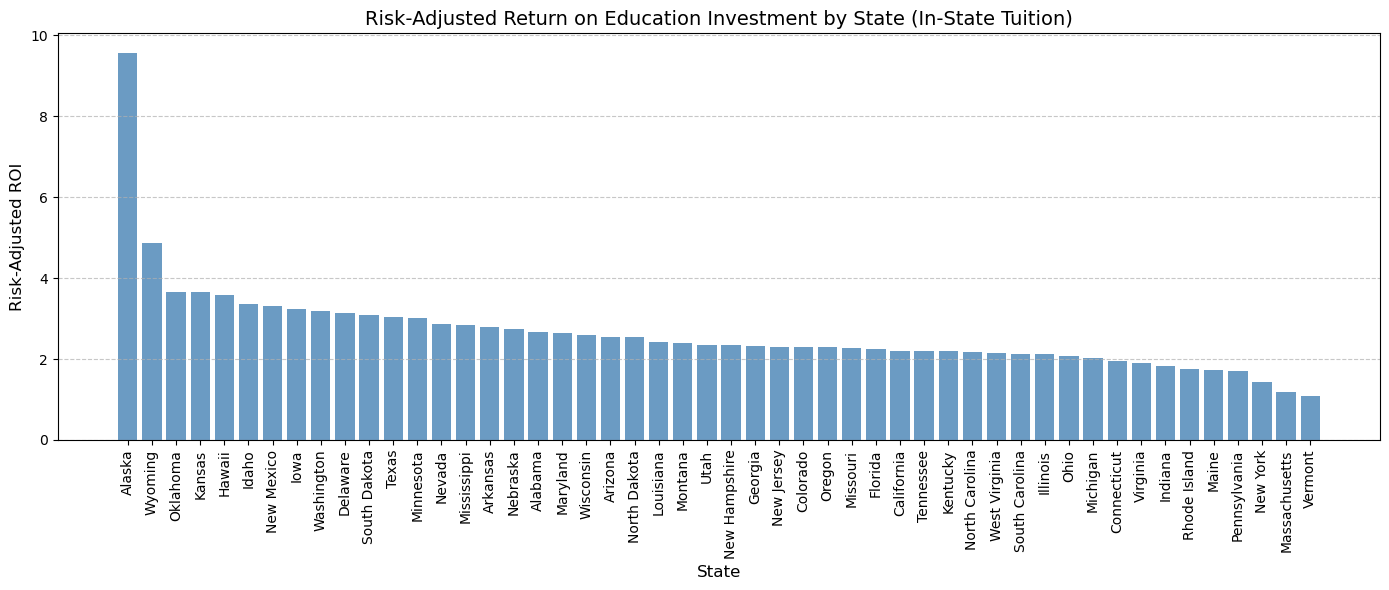

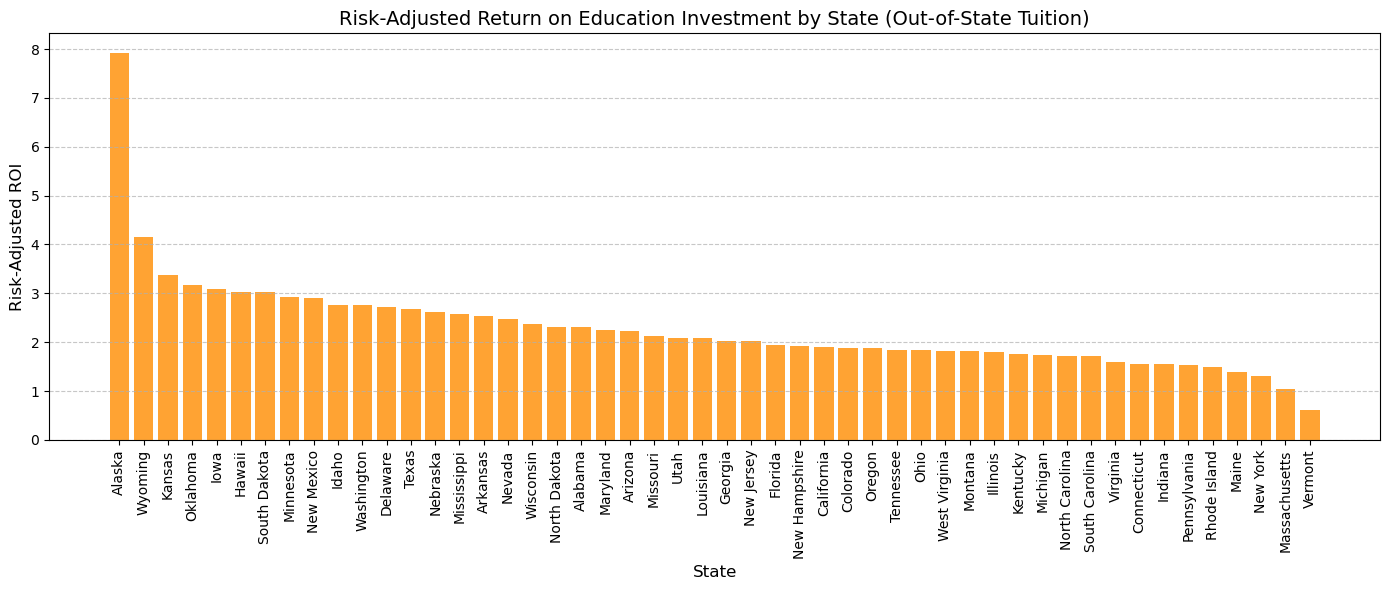

In [261]:
# --- Sort states for plotting ---
state_stats_sorted_instate = state_stats.sort_values("risk_adj_roi_instate", ascending=False)
state_stats_sorted_outstate = state_stats.sort_values("risk_adj_roi_outstate", ascending=False)

# --- Plot In-State Risk Adjusted ROI ---
plt.figure(figsize=(14,6))
plt.bar(
    state_stats_sorted_instate.index,
    state_stats_sorted_instate["risk_adj_roi_instate"],
    color="steelblue",
    alpha=0.8
)
plt.title("Risk-Adjusted Return on Education Investment by State (In-State Tuition)", fontsize=14)
plt.ylabel("Risk-Adjusted ROI", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot Out-of-State Risk Adjusted ROI ---
plt.figure(figsize=(14,6))
plt.bar(
    state_stats_sorted_outstate.index,
    state_stats_sorted_outstate["risk_adj_roi_outstate"],
    color="darkorange",
    alpha=0.8
)
plt.title("Risk-Adjusted Return on Education Investment by State (Out-of-State Tuition)", fontsize=14)
plt.ylabel("Risk-Adjusted ROI", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Anything above a 2 shows that the ROI is excellent! Some states have a ROI between 2-1.5 which is good but may depend on various factors including their major. 

In [262]:
# Prepare table with relevant columns
ranked_states = state_stats[[
    "avg_instate_tuition", "avg_outstate_tuition", "avg_earnings",
    "risk_adj_roi_instate", "risk_adj_roi_outstate"
]].copy()

# Sort by in-state risk-adjusted ROI
ranked_states = ranked_states.sort_values("risk_adj_roi_instate", ascending=False)

# Reset index so State is a column
ranked_states = ranked_states.reset_index()

# Optional: rename columns for clarity
ranked_states = ranked_states.rename(columns={
    "avg_instate_tuition": "Avg In-State Tuition",
    "avg_outstate_tuition": "Avg Out-of-State Tuition",
    "avg_earnings": "Avg Median Earnings (10yrs)",
    "risk_adj_roi_instate": "Risk-Adjusted ROI (In-State)",
    "risk_adj_roi_outstate": "Risk-Adjusted ROI (Out-of-State)"
})

# Display top 20 states as a table
ranked_states.head(20)


,State,Avg In-State Tuition,Avg Out-of-State Tuition,Avg Median Earnings (10yrs),Risk-Adjusted ROI (In-State),Risk-Adjusted ROI (Out-of-State)
0,Alaska,11660.666667,16862.500000,41850.000000,9.574030,7.924358
1,Wyoming,4396.222222,8425.555556,32133.333333,4.868033,4.160860
2,Oklahoma,10267.893617,13577.319149,34844.680851,3.654736,3.162602
3,Kansas,10747.783333,12421.533333,33163.333333,3.647313,3.374971
4,Hawaii,8377.388889,12494.722222,35244.444444,3.574816,3.026981
5,Idaho,10622.333333,14804.200000,34573.333333,3.356375,2.770349
6,New Mexico,6838.085714,9955.257143,32200.000000,3.310449,2.903570
7,Iowa,17184.666667,18134.316667,37438.333333,3.247998,3.095706
8,Washington,12010.014706,15386.382353,37085.294118,3.195682,2.765386
9,Delaware,11381.300000,15357.900000,41150.000000,3.131052,2.712796
